In [1]:
import numpy as np
import pandas as pd

In [2]:
import glob
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '/home/ubuntu/seongyoon/PI/Impedance')
from impedancecircuit.models.circuit import Circuit, sigmoid

Cycle 1
L     4.179136e-07
R0    3.786961e-01
R1    7.206411e-01
Q1    4.955899e-02
a1    5.430412e-01
R2    4.253195e-01
Q2    8.657276e+00
a2    6.521423e-01
Q3    1.332347e+01
a3    9.644156e-01
dtype: float64
Cycle 261
L     5.550669e-07
R0    4.008935e-01
R1    6.141642e-01
Q1    6.452570e-02
a1    9.456249e-01
R2    5.704693e-01
Q2    6.088867e+00
a2    6.852527e-01
Q3    9.340962e-02
a3    4.478326e-01
dtype: float64


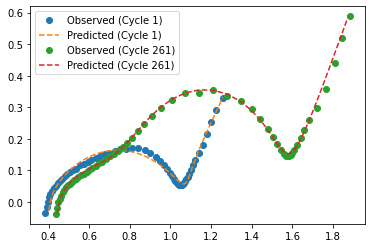

In [4]:
cellname = '25C01'
# Cell name list
# 25C01
# 25C02
# 25C03
# 25C04
# 25C05
# 25C06
# 25C07
# 25C08
# 35C01
# 35C02
# 45C01
# 45C02

datapath = './data/Cavendish/'

filename = f'{datapath}EIS_state_V_{cellname}.txt'

data = pd.read_csv(filename, delimiter='\t')
data.columns = data.columns.str.strip()

for cycle in [1, 261]:
    data_real = data[data['cycle number'] == cycle]['Re(Z)/Ohm'].values
    data_imag = data[data['cycle number'] == cycle]['-Im(Z)/Ohm'].values
    data_freq = data[data['cycle number'] == cycle]['freq/Hz'].values
    plt.plot(
        data_real,
        data_imag,
        'o', label=f'Observed (Cycle {cycle})'
    )
    
    impedance = np.concatenate([data_real, data_imag])

    circuit_str = 'l-r-(r,cpe)-(r-cpe)-cpe'

    custom_initial_guess = np.ones(10)
    custom_initial_guess[1] = np.log(min(data_real))
    custom_initial_guess[0] = np.log(abs(data_imag[np.argmin(data_real)])/(2*np.pi*data_freq[np.argmin(data_real)]))
    circuit = Circuit(circuit_str, custom_initial_guess)

    circuit.fit(data_freq, impedance)
    impedance_pred = circuit.predict(data_freq)

    plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '--', label=f'Predicted (Cycle {cycle})')
    
    sigmoid_idx = np.zeros(len(circuit.parameters), dtype=int)
    sigmoid_idx[[4, 7, 9]] = 1
    print(f'Cycle {cycle}')
    print(pd.Series(np.where(sigmoid_idx,sigmoid(circuit.parameters),np.exp(circuit.parameters)), index=['L', 'R0', 'R1', 'Q1', 'a1', 'R2', 'Q2', 'a2', 'Q3', 'a3']))
    
plt.legend()
plt.show()

['./data/Tongji/NCA battery/CY25_0.25_1.xlsx', './data/Tongji/NCA battery/CY25_0.5_1.xlsx', './data/Tongji/NCA battery/CY25_1_1.xlsx', './data/Tongji/NCA battery/CY35_0.5_1.xlsx', './data/Tongji/NCA battery/CY45_0.5_1.xlsx']
Sheet 1_1RCPE
L     2.997102e-07
R0    1.653277e-02
R1    9.914518e-01
Q1    2.318896e+02
a1    1.540910e-03
R2    1.785091e-04
Q2    4.720779e-02
a2    9.956049e-01
Q3    8.315101e+01
a3    9.568313e-02
dtype: float64
Sheet 4_2RCPE
L     3.205779e-07
R0    3.128028e-02
R1    5.344240e-02
Q1    1.598148e+02
a1    5.859329e-01
R2    1.491502e-02
Q2    2.976601e+02
a2    5.089553e-01
Q3    8.737685e-01
a3    6.196242e-01
dtype: float64


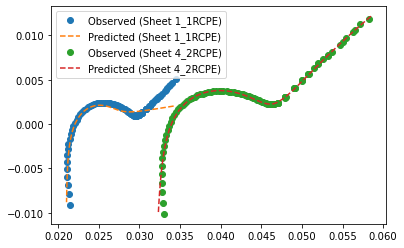

In [5]:
datapath = './data/Tongji/NCA battery/'

filename = sorted(glob.glob(f'{datapath}*.xlsx'))
print(filename)

sheet_names = pd.ExcelFile(filename[2]).sheet_names
for sheet in [sheet_names[0], sheet_names[3]]:
    data = pd.read_excel(filename[2], sheet_name=sheet)
    data_real = data["Data: Z'"].values
    data_imag = -data["Data: Z''"].values
    data_freq = data["Data: Frequency"].values
    plt.plot(
        data_real,
        data_imag,
        'o', label=f'Observed (Sheet {sheet})'
    )
    
    impedance = np.concatenate([data_real, data_imag])

    circuit_str = 'l-r-(r,cpe)-(r-cpe)-cpe'

    custom_initial_guess = np.ones(10)
    custom_initial_guess[1] = np.log(min(data_real))
    custom_initial_guess[0] = np.log(abs(data_imag[np.argmin(data_real)])/(2*np.pi*data_freq[np.argmin(data_real)]))
    circuit = Circuit(circuit_str, custom_initial_guess)

    circuit.fit(data_freq, impedance)
    impedance_pred = circuit.predict(data_freq)

    plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '--', label=f'Predicted (Sheet {sheet})')
    
    sigmoid_idx = np.zeros(len(circuit.parameters), dtype=int)
    sigmoid_idx[[4, 7, 9]] = 1
    print(f'Sheet {sheet}')
    print(pd.Series(np.where(sigmoid_idx,sigmoid(circuit.parameters),np.exp(circuit.parameters)), index=['L', 'R0', 'R1', 'Q1', 'a1', 'R2', 'Q2', 'a2', 'Q3', 'a3']))
    
plt.legend()
plt.show()

['./data/Tongji/NCM battery/CY25_0.5_1.xlsx', './data/Tongji/NCM battery/CY35_0.5_1.xlsx', './data/Tongji/NCM battery/CY45_0.5_1.xlsx']
Sheet 1
L     5.093048e-07
R0    2.904412e-02
R1    9.229439e-03
Q1    5.146689e+00
a1    5.442950e-01
R2    9.872719e-01
Q2    9.899677e-01
a2    5.036170e-01
Q3    3.223394e+02
a3    5.916442e-01
dtype: float64
Sheet 9
L     4.917672e-07
R0    3.312386e-02
R1    3.173109e-02
Q1    6.421480e+00
a1    8.759860e-01
R2    7.200994e-03
Q2    2.097481e+02
a2    5.685466e-01
Q3    8.476501e-01
a3    7.197783e-01
dtype: float64


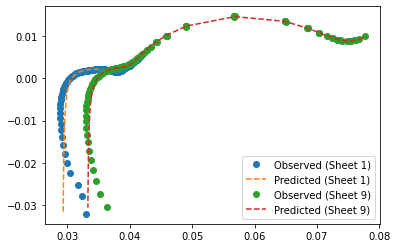

In [6]:
datapath = './data/Tongji/NCM battery/'

filename = sorted(glob.glob(f'{datapath}*.xlsx'))
print(filename)

sheet_names = pd.ExcelFile(filename[0]).sheet_names
for sheet in [sheet_names[0], sheet_names[8]]:
    data = pd.read_excel(filename[0], sheet_name=sheet)
    data_real = data["Data: Z'"].values
    data_imag = -data["Data: Z''"].values
    data_freq = data["Data: Frequency"].values
    plt.plot(
        data_real,
        data_imag,
        'o', label=f'Observed (Sheet {sheet})'
    )
    
    impedance = np.concatenate([data_real, data_imag])

    circuit_str = 'l-r-(r,cpe)-(r-cpe)-cpe'

    custom_initial_guess = np.ones(10)
    custom_initial_guess[1] = np.log(min(data_real))
    custom_initial_guess[0] = np.log(abs(data_imag[np.argmin(data_real)])/(2*np.pi*data_freq[np.argmin(data_real)]))
    circuit = Circuit(circuit_str, custom_initial_guess)

    circuit.fit(data_freq, impedance)
    impedance_pred = circuit.predict(data_freq)

    plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '--', label=f'Predicted (Sheet {sheet})')
    
    sigmoid_idx = np.zeros(len(circuit.parameters), dtype=int)
    sigmoid_idx[[4, 7, 9]] = 1
    print(f'Sheet {sheet}')
    print(pd.Series(np.where(sigmoid_idx,sigmoid(circuit.parameters),np.exp(circuit.parameters)), index=['L', 'R0', 'R1', 'Q1', 'a1', 'R2', 'Q2', 'a2', 'Q3', 'a3']))
    
plt.legend()
plt.show()